**J Matheus**

# **Casilla de código base (Ejecute siempre antes de usar el solucionador, no modifique).**

In [2]:


import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import sympify, lambdify, symbols
from sympy.core.sympify import SympifyError

class BisectionSolver:
    """
    Implementa el método de bisección para encontrar raíces
    usando Programación Orientada a Objetos.
    """

    def __init__(self, f):
        if not callable(f):
            raise TypeError("El parámetro 'f' debe ser una función (callable).")
        self.f = f
        self.iterations = 0
        self.root = None
        self.error = None
        self.history = []

    def solve(self, a, b, tol=1e-7, max_iter=100):
        self.iterations = 0
        self.root = None
        self.error = None
        self.history = []
        self._initial_a = a
        self._initial_b = b
        current_a, current_b = a, b
        fa, fb = self.f(current_a), self.f(current_b)

        if fa * fb >= 0:
            raise ValueError(f"Bisección falló. f(a) y f(b) deben tener signos opuestos. "
                             f"f({a})={fa:.4f}, f({b})={fb:.4f}")

        for i in range(max_iter):
            self.iterations = i + 1
            c = (current_a + current_b) / 2.0
            current_error = (current_b - current_a) / 2.0
            fc = self.f(c)

            self.history.append({'iteration': i+1, 'a': current_a, 'b': current_b,
                                 'c': c, 'fc': fc, 'error': current_error})

            if fc == 0 or current_error < tol:
                self.root, self.error = c, current_error
                return c

            if fa * fc < 0:
                current_b = c
            else:
                current_a, fa = c, fc

        self.root, self.error = c, current_error
        print(f"\nAdvertencia: Se alcanzó el máximo de iteraciones ({max_iter}).")
        return self.root

    def plot_results(self):
        if self.root is None: print("Ejecute 'solve()' primero."); return
        plt.figure(figsize=(12, 5))
        # Gráfico 1: Función y Raíz
        plt.subplot(1, 2, 1)
        plot_a = self._initial_a - abs(self._initial_b - self._initial_a) * 0.1
        plot_b = self._initial_b + abs(self._initial_b - self._initial_a) * 0.1
        x_vals = np.linspace(plot_a, plot_b, 500)
        y_vals = np.array([self.f(xi) for xi in x_vals])
        plt.plot(x_vals, y_vals, label='f(x)')
        plt.axhline(0, color='gray', linestyle='--', lw=0.8, label='y=0')
        plt.axvline(self._initial_a, color='green', linestyle=':', label='Intervalo [a, b]')
        plt.axvline(self._initial_b, color='green', linestyle=':')
        plt.plot(self.root, self.f(self.root), 'ro', ms=8, label=f'Raíz ({self.root:.4f})')
        plt.title('Función y Raíz (Bisección)'); plt.xlabel('x'); plt.ylabel('f(x)')
        plt.grid(True); plt.legend()
        # Gráfico 2: Convergencia
        plt.subplot(1, 2, 2)
        iters = [h['iteration'] for h in self.history]
        errors = [h['error'] for h in self.history]
        plt.semilogy(iters, errors, '-o', label='Error |b-a|/2')
        plt.title('Convergencia (Bisección)'); plt.xlabel('Iteración'); plt.ylabel('Error (log scale)')
        plt.grid(True, which="both", ls="--"); plt.legend()
        plt.tight_layout(); plt.show()



#*Solucionador; ejecute la siguiente casilla y siga los pasos para obtener los resultados. Utilicelo cuántas veces sea necesario.*

--- Solucionador de Ecuaciones (Método de Bisección) ---
------------------------------------------------------------
Ingrese la función f(x) (p.ej. x**3 - x - 2): x**3 - x - 2
Función a resolver: f(x) = x**3 - x - 2
------------------------------------------------------------
Ingrese el límite inferior del intervalo (a): 1
Ingrese el límite superior del intervalo (b): 2
Ingrese la tolerancia (o presione Enter para 1e-7): 
Usando tolerancia por defecto: 1e-07

Iniciando BisectionSolver para f(x) en [1.0, 2.0]...

--- Resultados Técnicos del Solver (Bisección) ---
Raíz encontrada:     1.52137965
Valor de f(raíz):    -3.40e-07
Iteraciones:         24
Error estimado |b-a|/2: 5.96e-08

      --- Resumen de Estimación para el Cliente ---

Proyecto: Análisis de la función f(x) = x**3 - x - 2

> **1. Problema:**
> Se nos solicitó encontrar el 'punto de equilibrio' (raíz) de la función, es decir, 
> el valor de 'x' para el cual la función es igual a cero.

> **2. Estimación de la Solución:**
>

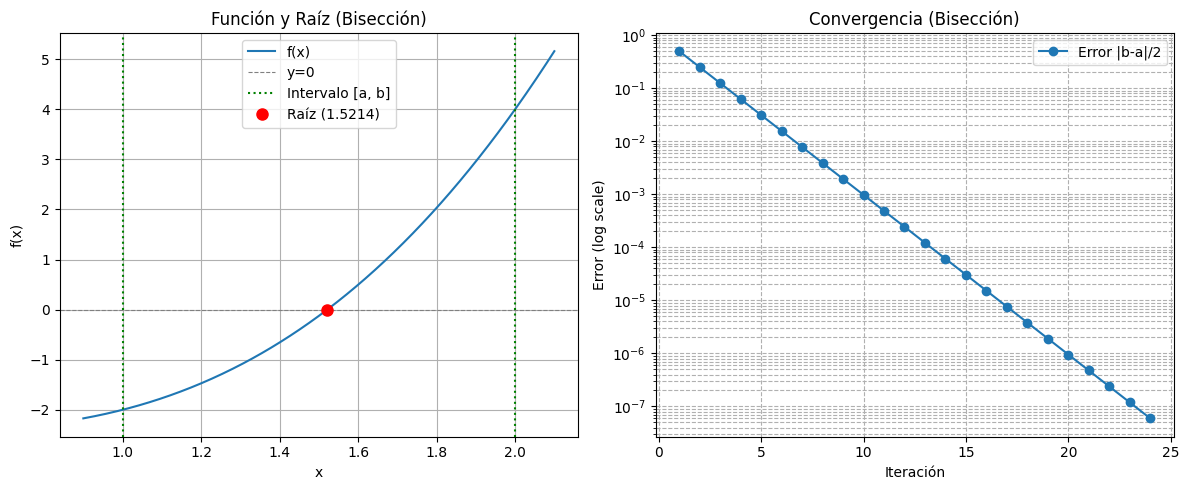

In [3]:
# --- CELDA 2: SCRIPT INTERACTIVO ---
# (Puedes ejecutar esta celda cuantas veces quieras)

print("--- Solucionador de Ecuaciones (Método de Bisección) ---")
print("-" * 60)

try:
    # --- 1. Pedir Función ---
    func_string = input("Ingrese la función f(x) (p.ej. x**3 - x - 2): ")

    x = symbols('x')
    expr = sympify(func_string)
    mi_funcion = lambdify(x, expr, 'math')

    print(f"Función a resolver: f(x) = {expr}")
    print("-" * 60)

    # --- 2. Pedir Intervalo ---
    a_input = input("Ingrese el límite inferior del intervalo (a): ")
    a_val = float(a_input)

    b_input = input("Ingrese el límite superior del intervalo (b): ")
    b_val = float(b_input)

    # --- 3. Pedir Tolerancia ---
    tol_input = input(f"Ingrese la tolerancia (o presione Enter para 1e-7): ")

    if tol_input == "":
        tol_val = 1e-7
        print(f"Usando tolerancia por defecto: {tol_val}")
    else:
        tol_val = float(tol_input)

    # --- 4. Crear y usar el solver de Bisección ---
    # ¡Aquí es donde usamos la clase de la Celda 1!
    solver_biseccion = BisectionSolver(f=mi_funcion)

    print(f"\nIniciando BisectionSolver para f(x) en [{a_val}, {b_val}]...")
    raiz_aprox = solver_biseccion.solve(a=a_val, b=b_val, tol=tol_val)

    # --- 5. Calcular f(raíz) ---
    f_en_raiz = mi_funcion(solver_biseccion.root)

    # --- 6. Reporte Técnico ---
    print("\n--- Resultados Técnicos del Solver (Bisección) ---")
    print(f"Raíz encontrada:     {solver_biseccion.root:.8f}")
    print(f"Valor de f(raíz):    {f_en_raiz:.2e}")
    print(f"Iteraciones:         {solver_biseccion.iterations}")
    print(f"Error estimado |b-a|/2: {solver_biseccion.error:.2e}")

    # --- 7. Resumen para el Cliente ---
    print("\n" + "="*60)
    print("      --- Resumen de Estimación para el Cliente ---")
    print("="*60)
    print(f"\nProyecto: Análisis de la función f(x) = {expr}")
    print("\n> **1. Problema:**")
    print(f"> Se nos solicitó encontrar el 'punto de equilibrio' (raíz) de la función, es decir, \n> el valor de 'x' para el cual la función es igual a cero.")
    print("\n> **2. Estimación de la Solución:**")
    print(f"> El valor de 'x' que resuelve la ecuación es: **{solver_biseccion.root:.10f}**")
    print("\n> **3. Nivel de Confianza (Precisión):**")
    print(f"> La estimación es de alta precisión. Al evaluar la función en este punto, el resultado es \n> {f_en_raiz:.2e} (un número extremadamente cercano a cero).")
    print(f"> El cálculo se completó eficientemente en **{solver_biseccion.iterations} pasos**.")
    print("\n> **4. Visualización:**")
    print(f"> A continuación, se presentan los gráficos que ilustran la solución encontrada y la \n> eficiencia del método.")
    print("="*60 + "\n")

    # --- 8. Generar los GRÁFICOS ---
    solver_biseccion.plot_results()

except (SympifyError, ValueError, RuntimeError) as e:
    print(f"\n[ERROR] Ocurrió un problema:")
    print(f"{e}")
except Exception as e:
    print(f"\n[ERROR INESPERADO] {e}")